In [1]:
import re
from os import listdir
import networkx as nx
import numpy as np
import pandas as pd
import pickle

In [2]:
PATH_DATA = "V:/Programmazione/Amazon/"

In [3]:
df_to_text = pd.read_pickle("%sAmazonDataProjectNoText.pkl" % PATH_DATA)

In [4]:
g = nx.Graph()

In [5]:
for index,row in df_to_text.iterrows():
    g.add_node(row.customer_id,isCust=True)
    g.add_node(row.product_id,isCust=False,
               title=row.product_title, 
               cat=row.product_category
              )
    g.add_edge(row.customer_id, row.product_id, 
               weight = row.star_rating, 
               verify = row.verified_purchase,
               date = row.review_date,
               id_rew = index
              )

In [6]:
print(len(g.edges()))

1704586


In [7]:
nx.write_gpickle(g,"%srawNetworg.gpickle"%PATH_DATA)

In [8]:
with open('%scustomersDict.pickle'%PATH_DATA, 'rb') as handle:
    customersDict = pickle.load(handle)

In [9]:
customerNOfOrder = dict()
for key,value in customersDict.items():
    customerNOfOrder[len(value)] = customerNOfOrder.get(len(value),0)+1

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

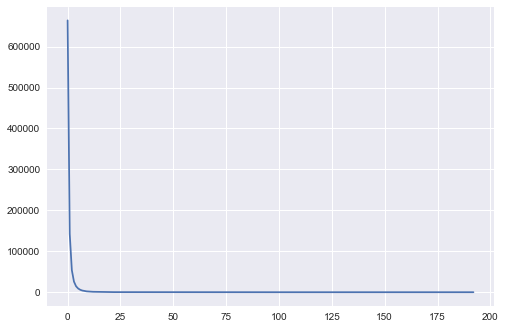

In [11]:
plt.plot(customerNOfOrder.values())
plt.show()

In [12]:
prec = 0
cumulative = list()
totOrders = 0.0
for key,value in customerNOfOrder.items():
    cumulative.append(value+prec)
    prec += value
    totOrders+=value
cumulative = [value/totOrders for value in cumulative]

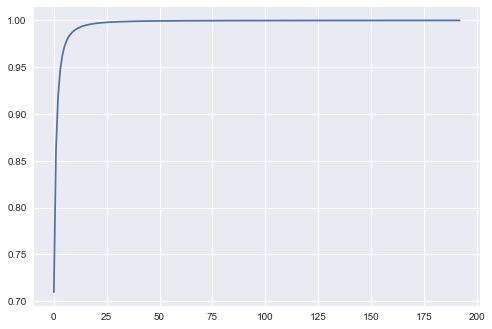

In [13]:
plt.plot(cumulative)
plt.show()